In [1]:
%matplotlib inline
import pylab
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHmm


ImportError: cannot import name 'GaussianHmm' from 'hmmlearn.hmm' (C:\ProgramData\Anaconda3\lib\site-packages\hmmlearn\hmm.py)

In [2]:
!pip install hmmlearn

In [3]:
%matplotlib inline
import pylab
import numpy as np
import pandas as pd
from hmmlearn.hmm import GaussianHMM

In [5]:
df = pd.read_csv('C:/Users/maity/OneDrive/Desktop/New folder (40)/speed.csv', sep = ",")
df.head(5)

,row,rt,corr,Pacc,prev
0,1,6.456770,cor,0.0,inc
1,2,5.602119,cor,0.0,cor
2,3,6.253829,inc,0.0,cor
3,4,5.451038,inc,0.0,inc
4,5,5.872118,inc,0.0,inc


In [6]:
x = df.drop(["row" , "corr"], axis = 1)
x["prev"] = pd.factorize(x["prev"])[0]

In [7]:
model = GaussianHMM(n_components= 2, n_iter=10000, random_state=1).fit(x)
model.monitor_

ConvergenceMonitor(
    history=[-491.0712660649909, -182.71685923342585, -120.42108418062575, -117.0326152369211, -116.55758174216903, -116.46544010163925, -116.44940310316693, -116.44670518280664],
    iter=8,
    n_iter=10000,
    tol=0.01,
    verbose=False,
)

In [8]:
states  = model.predict(x)
pd.Series(states).value_counts()

0    243
1    196
dtype: int64

In [9]:
model.means_[:,0]

array([6.40098754, 5.56434105])

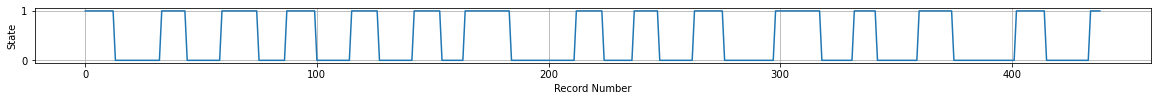

In [10]:
fig = pylab.figure(figsize=(20, 1))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_xlabel("Record Number")
ax.set_ylabel("State")
ax.plot(states)